In [1]:
#read-manipulate this data
#real world- raw data(csv,json,databsess, big)

# Q) Predict whether restaurant is a success or not?

#read data--raw data--data cleaning--feature engineering
#100 features, rest--success/not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #for data visualization
import seaborn as sns      #advance data visualization library

In [3]:
df=pd.read_csv('zomato.csv')

In [4]:
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [3]:
# pd.read_csv() return dataframe object

In [4]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [5]:
df.shape

(51717, 17)

In [6]:
#NAN=missing values

In [8]:
df.isna().sum()   #shows number of missing values in each column; can also use isnull()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]   #extracting columns in a list which have NAN values

In [8]:
df['rate'].isnull().sum()

7775

In [9]:
len(df)

51717

In [10]:
np.round(df['rate'].isnull().sum()/len(df)*100,4)   # about 15% of the data is null in the rate col

15.0337

In [11]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [12]:
len(df)

51717

In [13]:
#printing percentage of missing values in the column
for feature in feature_na:
    print('{} has {}% missing values'.format(feature, np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337% missing values
phone has 2.3358% missing values
location has 0.0406% missing values
rest_type has 0.4389% missing values
dish_liked has 54.2916% missing values
cuisines has 0.087% missing values
approx_cost(for two people) has 0.669% missing values


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Cleaning our data

In [15]:
df['approx_cost(for two people)'].dtype #data is in object datatype

dtype('O')

In [16]:
#approx cost is in object datatype becoz there is some special charecter in the some value
#we have to convert it to interger/float datatype

In [17]:
df[df['approx_cost(for two people)'].isnull()]   #showing all values with NaN in approx_cost

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [18]:
df['approx_cost(for two people)'].unique()    #special charecter is ','

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
#write a function to remove coma
#converting approx_cost to string datatype then replacing ',' with ''
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [20]:
#.astype() method is used to convert any pandas object to specific datatype. Also provides the capability to convert any
#suitable existing column to categorical type

In [21]:
"""def comma_replace(x):
        return replace(',','')
        
    df['approx_cost(for two people)'].astype(str).apply(comma_replace)"""

"def comma_replace(x):\n        return replace(',','')\n        \n    df['approx_cost(for two people)'].astype(str).apply(comma_replace)"

In [22]:
df['approx_cost(for two people)'].unique()    #comma is removed

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [23]:
# converting string to float type data
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)'].dtype

dtype('float64')

In [24]:
#in rates we have to remove the denominator

In [25]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [26]:
df['rate'][0].split('/')[0]

'4.1'

In [27]:
"""def split(x):
    return x.split('/')[0]"""

"def split(x):\n    return x.split('/')[0]"

In [28]:
df['rate']=df['rate'].astype(str).apply(lambda x:x.split('/')[0])

In [29]:
df['rate'].unique().dtype

dtype('O')

In [30]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [31]:
df['rate'].replace('-',0,inplace=True)    #inplace is used for updating the value
df['rate'].replace('NEW',0,inplace=True)

In [32]:
df['rate']=df['rate'].astype(float)
df['rate'].dtype

dtype('float64')

### Analyzing our categories of restaurants

In [33]:
df['rest_type'].value_counts()  #counts the number of values in each categories

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

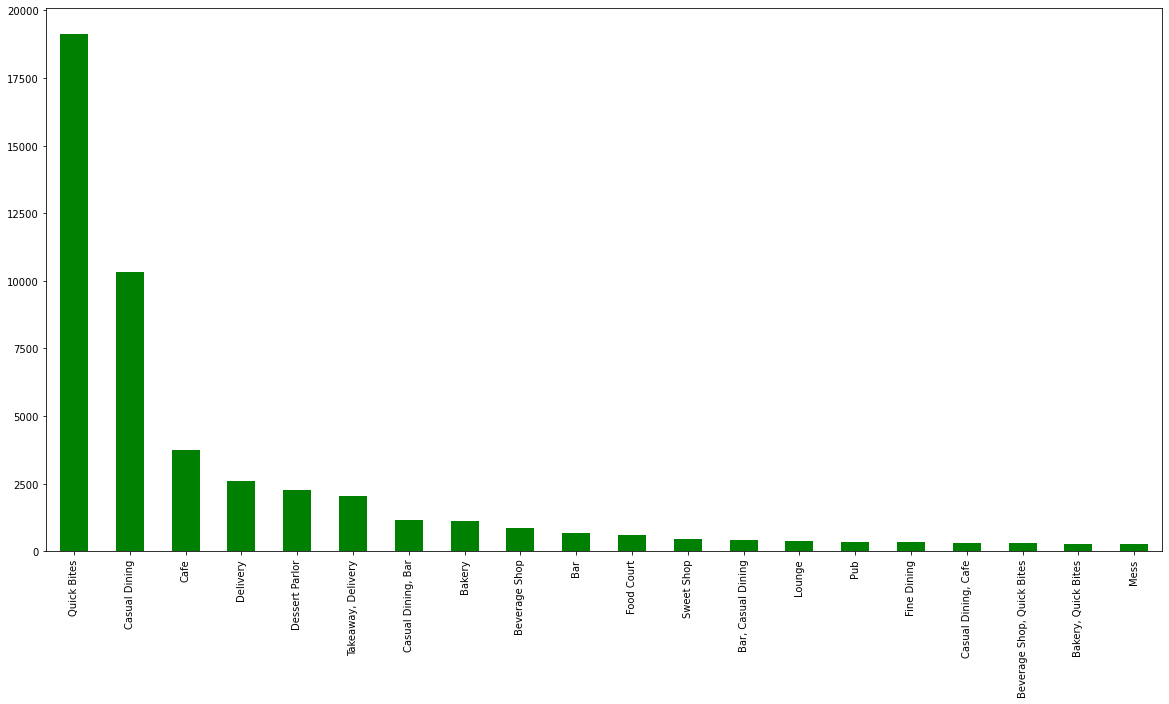

In [34]:
plt.figure(figsize=(20,10))
df['rest_type'].value_counts().nlargest(20).plot.bar(color="green")      #nlargest for largest 20 only to be shown
plt.show()

In [35]:
# making these entire insights in a summarized way

def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dinings'
    else:
        return 'others'
    
#this functions stores whether a restaurant is from quick_bites/casual dining or any other

In [36]:
df['Top_types']=df['rest_type'].apply(mark)   #creating a new column and storing the Mark

In [37]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     Top_types  
0          Buffet    Banashankari  Quick Bites + Casual Dinings  
1          Buffet    Banashankari  Quick Bites + Casual Dinings  
2          Buffet    Banashankari                        others  
3          Buffet    Banashankari  Quick Bites + Casual Dinings  
4          Buffet    Banashankari  Quick Bites + Casual Dinings

In [38]:
# PlotLy is an advance data visualization library used when we have to some deployement level resource
!pip install plotly

In [39]:
import plotly.express as px    #Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

In [40]:
#to convert some figures into array put '.values' at the end
values=df['Top_types'].value_counts().values

In [41]:
#making index for our chart
label=df['Top_types'].value_counts().index

In [42]:
px.pie(df, names=label, values=values)

### Creating a new dataframe  which contains votes, cost and rating of each restaurant

In [43]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [44]:
df.groupby('name').agg({'votes':'sum', 'url':'count', 'approx_cost(for two people)':'mean', 'rate':'mean'})

# you may think things within that {} wud be normal dictionary,
# but python again surprises us as it is a distionary but keys are columns and values are function applied on the key

votes  url  \
name                                                       
#FeelTheROLL                                     14    2   
#L-81 Cafe                                      432    9   
#Vibes Restro                                     0    3   
#refuel                                         111    3   
'Brahmins' Thatte Idli                            0    1   
...                                             ...  ...   
late100                                           0    5   
nu.tree                                        1443    8   
re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
repEAT Hub                                        0    2   
sCoolMeal                                         0    5   

                                              approx_cost(for two people)  \
name                                                                        
#FeelTheROLL                                                        200.0   
#L-81 Cafe                                                          400.0   
#Vibes Restro                                                       700.0   
#refuel                                                             400.0   
'Brahmins' Thatte Idli                                              100.0   
...                                                                   ...   
late100                                                             200.0   
nu.tree                                                             400.0   
re:cess - Hilton Bangalore Embassy GolfLinks                       1200.0   
repEAT Hub                                                          200.0   
sCoolMeal                                                           300.0   

                                                  rate  
name                                                    
#FeelTheROLL                                  3.400000  
#L-81 Cafe                                    3.900000  
#Vibes Restro                                      NaN  
#refuel                                       3.700000  
'Brahmins' Thatte Idli                             NaN  
...                                                ...  
late100                                            NaN  
nu.tree                                       4.314286  
re:cess - Hilton Bangalore Embassy GolfLinks  4.100000  
repEAT Hub                                         NaN  
sCoolMeal                                          NaN  

[8792 rows x 4 columns]

In [45]:
rest=df.groupby('name').agg({'votes':'sum', 'url':'count', 'approx_cost(for two people)':'mean', 'rate':'mean'}).reset_index()
#reset_index() is used to give numbering to rows and making it a  dataframe
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [46]:
rest.columns=['name', 'total_votes','total_unities','avg_approx_cost','mean_rating']   #changing the name of columns
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [47]:
rest['votes_per_unity']=rest['total_votes']/rest['total_unities']    #adding a new column
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [48]:
popular=rest.sort_values(by='total_unities', ascending=False)

In [49]:
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [50]:
popular['name'].nunique()

8792

#### restaurant overview analysis

In [51]:
# avg votes rec by rest
# top 5 most voted rest
# top 5 less voted rest

In [52]:
popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').head(5)

name  total_votes  total_unities  avg_approx_cost  \
5549             Onesta       347520             85       600.000000   
8269           Truffles       301059             43       900.000000   
2446  Empire Restaurant       229808             71       685.211268   
3054           Hammered       180602             47      1272.340426   
7751    The Black Pearl       172122             18      1427.777778   

      mean_rating  votes_per_unity  
5549     4.410588      4088.470588  
8269     4.595349      7001.372093  
2446     3.916901      3236.732394  
3054     4.329787      3842.595745  
7751     4.727778      9562.333333

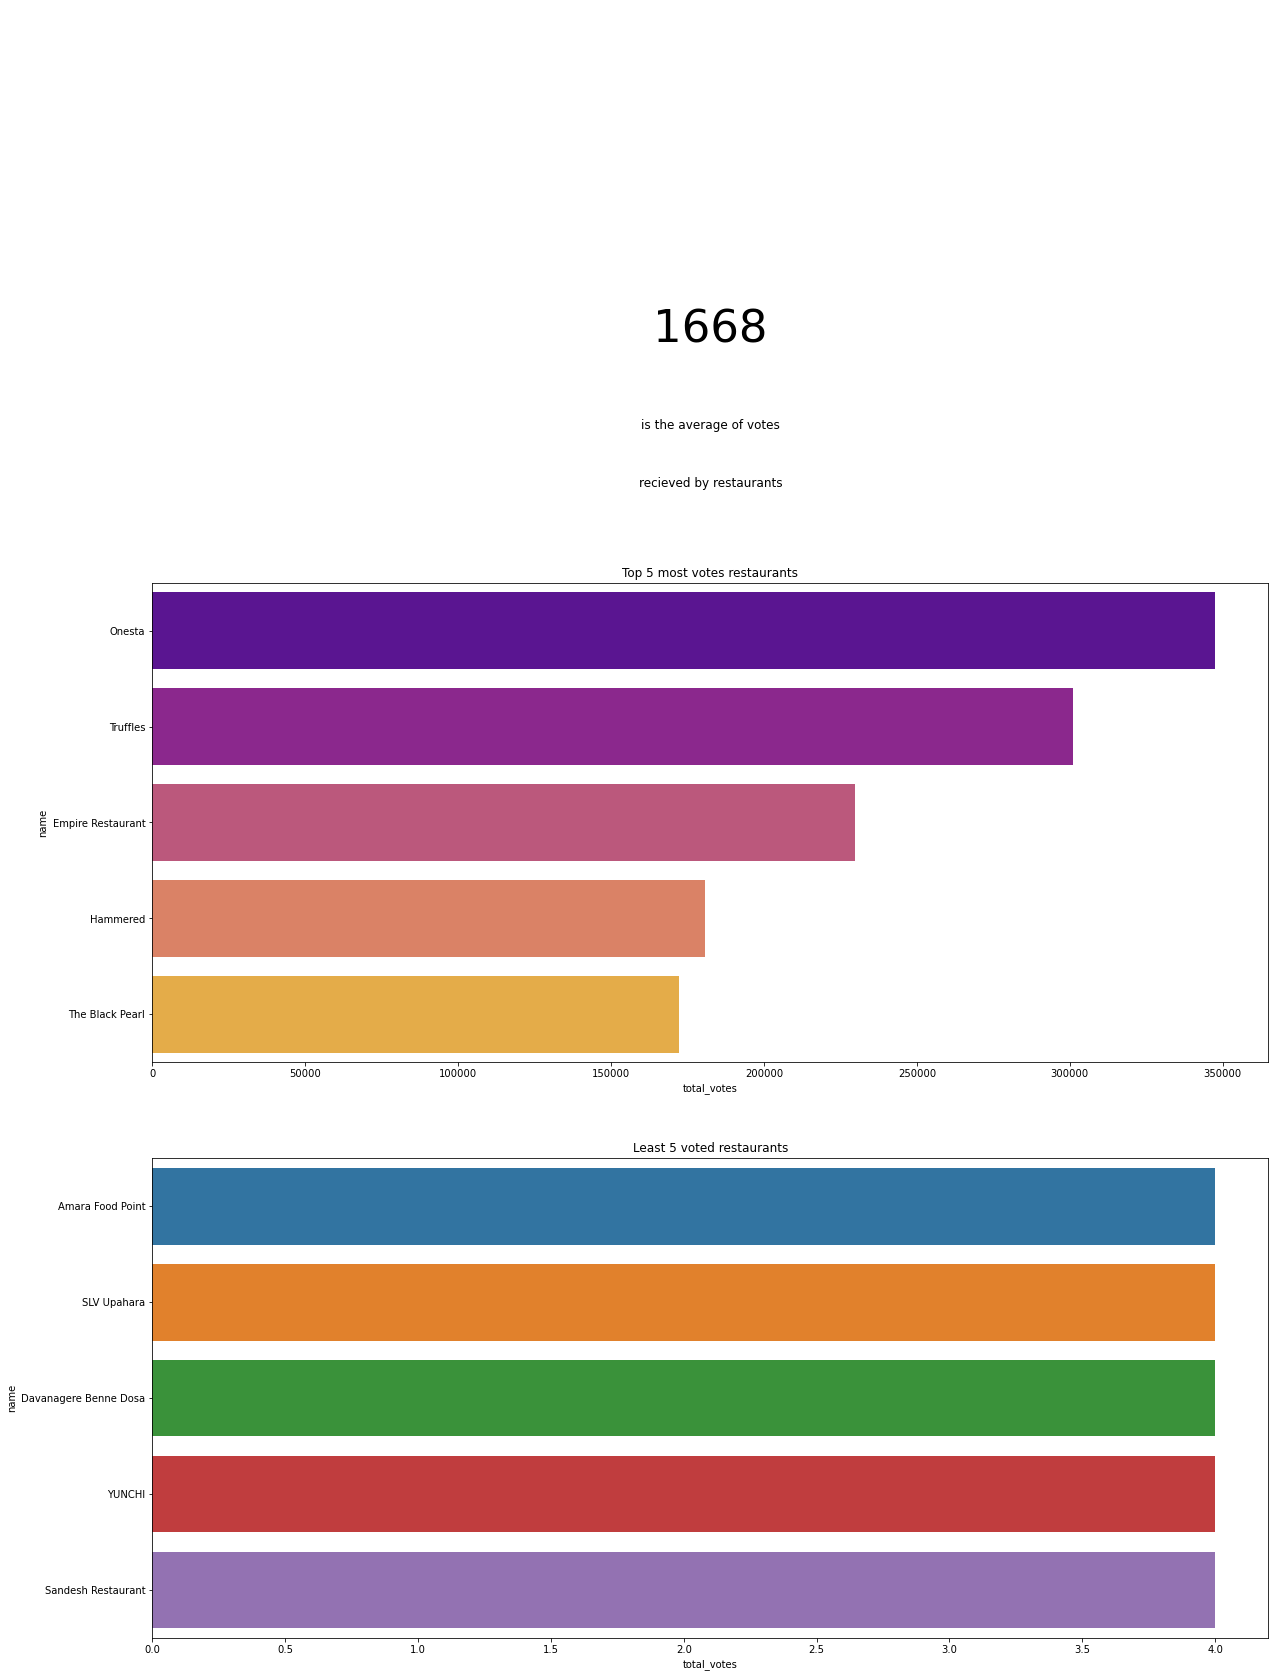

In [53]:
#creating a subplot
#using seaborn
fig, (ax1, ax2, ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, "is the average of votes", fontsize=12, ha='center')
ax1.text(0.50, 0.00, "recieved by restaurants", fontsize=12, ha='center')
ax1.axis('off')  # for turning off the axis

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').head(5), ax=ax2, palette='plasma')
ax2.set_title('Top 5 most votes restaurants')    # setting title for a graph

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=True).query('total_votes > 0').head(5), ax=ax3)
ax3.set_title('Least 5 voted restaurants')

plt.show()

### Which restaurant is most exprensive or cheapest?

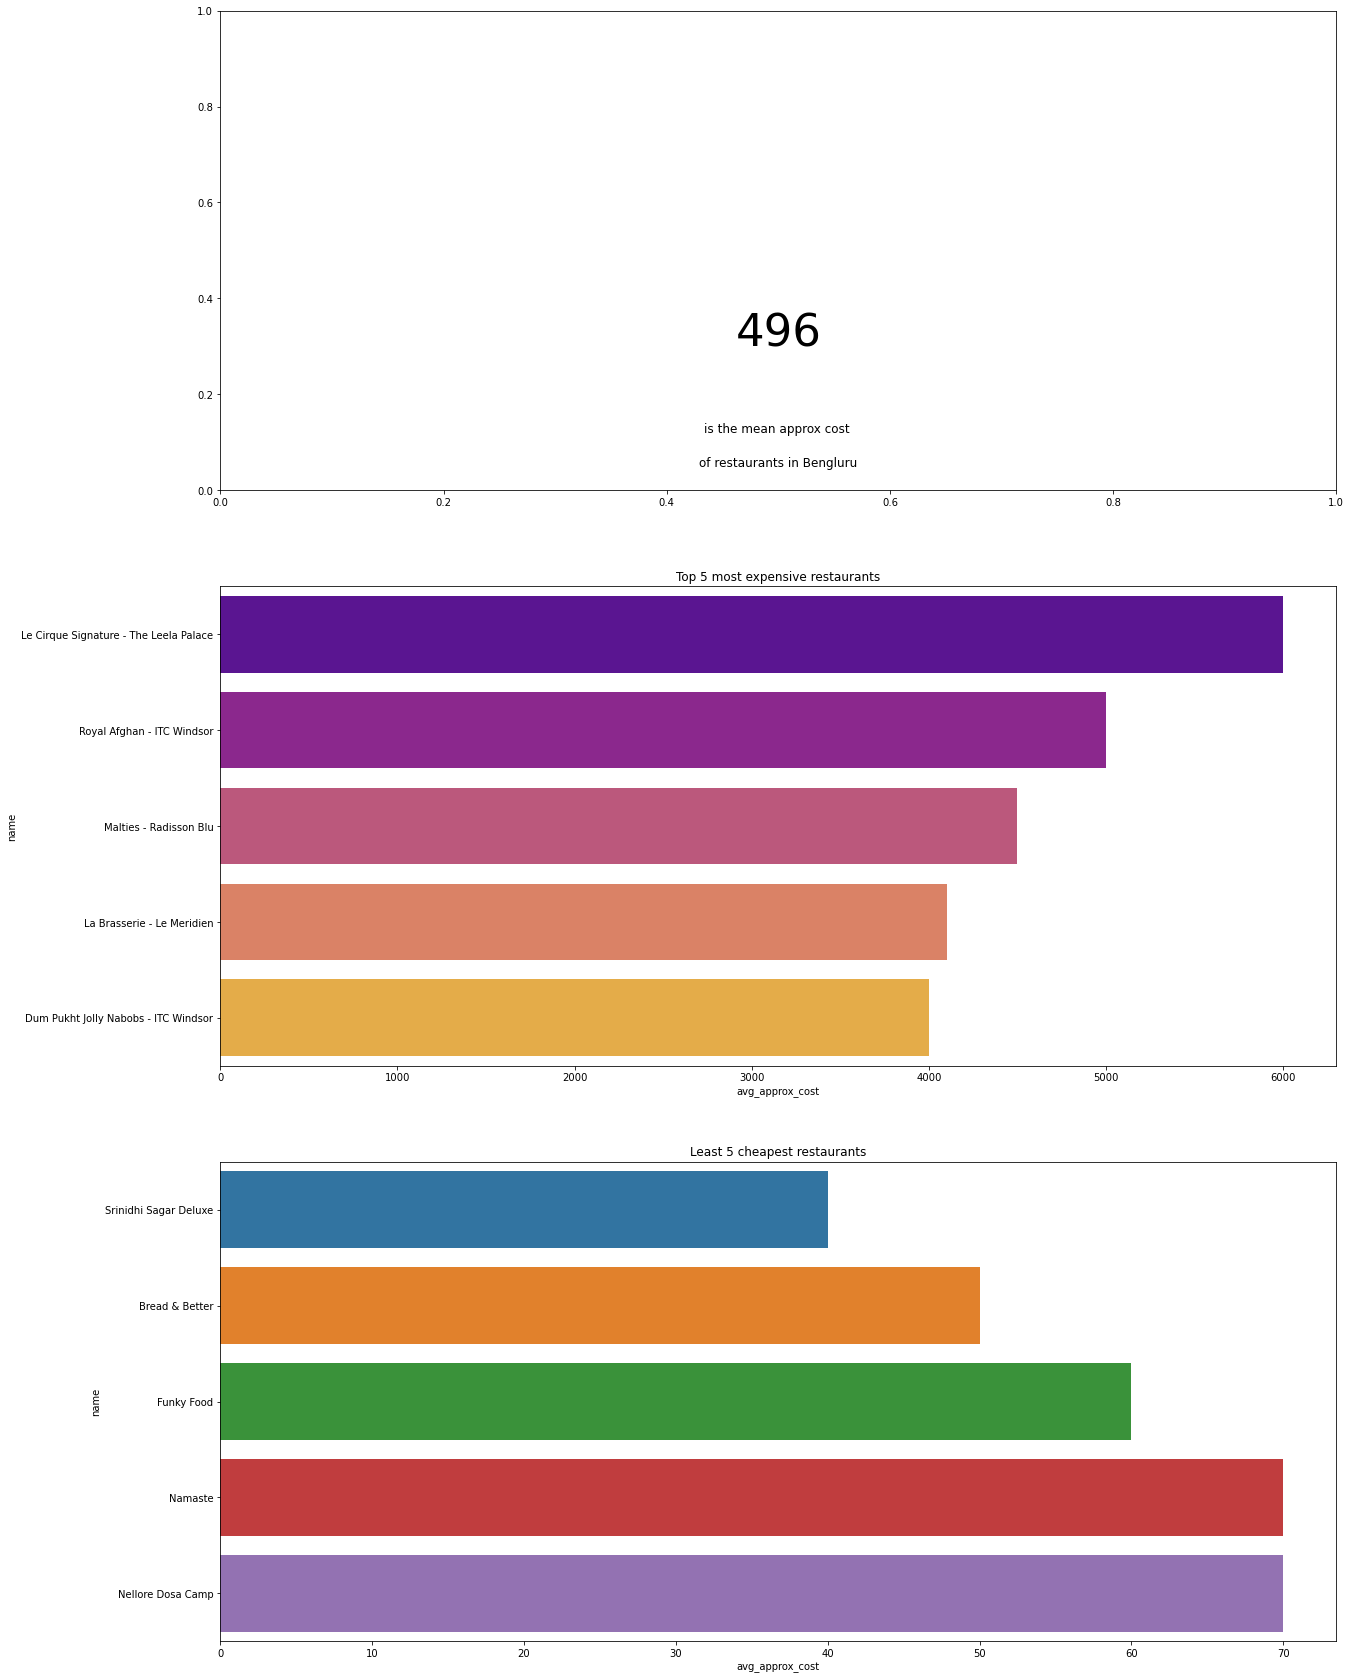

In [54]:
#creating a subplot
#using seaborn
fig, (bx1, bx2, bx3)=plt.subplots(3,1,figsize=(20,30))
bx1.text(0.50, 0.30, int(popular['avg_approx_cost'].mean()), fontsize=45, ha='center')
bx1.text(0.50, 0.12, "is the mean approx cost ", fontsize=12, ha='center')
bx1.text(0.50, 0.05, "of restaurants in Bengluru", fontsize=12, ha='center')
#ax1.axis('off')  # for turning off the axis

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').head(5), ax=bx2, palette='plasma')
bx2.set_title('Top 5 most expensive restaurants')    # setting title for a graph

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=True).query('avg_approx_cost > 0').head(5), ax=bx3)
bx3.set_title('Least 5 cheapest restaurants')

plt.show()

In [55]:
rest.sort_values(by='avg_approx_cost', ascending=False)['name'].head()

4372    Le Cirque Signature - The Leela Palace
6263                Royal Afghan - ITC Windsor
4628                    Malties - Radisson Blu
4276                La Brasserie - Le Meridien
2965               Grill 99 - The Ritz-Carlton
Name: name, dtype: object

In [56]:
# How many offer book table sevice? 

In [57]:
x=df['book_table'].value_counts()
labels=['not book', 'book']
labels

['not book', 'book']

In [58]:
#for showing our data on piechart
import plotly.graph_objs as go
from plotly.offline import iplot
# search web for this section as it not explained in the video lecture thoroughly

In [59]:
trace=go.Pie(labels=labels, values=x, hoverinfo='label+percent')
iplot([trace])   #for displaying piechart have to pass trace into iplot

In [60]:
# And how about online sevice?

In [61]:
y=df['online_order'].value_counts()
label=['accepted', 'not accepted']

trace2=px.pie(df, names=label, values=y, title='online order acceptance')
trace2.show()

In [62]:
# Best budget restaurant at any location

In [63]:
filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget=df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                     Top_types  
928  Bannerghatta Road  Quick Bites + Casual Dinings  
934  Bannerghatta Road  Quick Bites + Casual Dinings  
940  Bannerghatta Road  Quick Bites + Casual Dinings  
942  Bannerghatta Road  Quick Bites + Casual Dinings  
954  Bannerghatta Road  Quick Bites + Casual Dinings

In [64]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [65]:
def return_budget(location, restaurant_type):
    filter=(df['approx_cost(for two people)']<=400) & (df['rate']>=4) & (df['location']==location) & (df['rest_type']==restaurant_type)
    budget=df[filter]
    return budget['name'].unique()

In [66]:
return_budget('BTM','Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [67]:
# Latitudes, Longitudes
# for geographical analysis of data

In [68]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     Top_types  
0          Buffet    Banashankari  Quick Bites + Casual Dinings  
1          Buffet    Banashankari  Quick Bites + Casual Dinings  
2          Buffet    Banashankari                        others  
3          Buffet    Banashankari  Quick Bites + Casual Dinings  
4          Buffet    Banashankari  Quick Bites + Casual Dinings

In [69]:
#for accessing geographical data have to use library geopy
!pip install geopy

In [70]:
from geopy.geocoders import Nominatim 
#Nominatim is your search engine for your open state metadata; 
#So whateven name state place you are gonna send to it will return its latitude and longitude

In [71]:
# lecture 11
geolocator=Nominatim(user_agent="app")

In [72]:
data=df['name'][0]
data   # this data in string format

'Jalsa'

In [73]:
# for getting the location we have to convert it to geographical format using geocode
#df['name'][0]=geolocator.geocode(data) showing stupid ununderstandable error
data=geolocator.geocode(data)

In [74]:
data.latitude

54.7774098

In [75]:
data.longitude

-1.646114869752264

In [76]:
df['location'].unique()    # NUNIQUE gives number of unique values while UNIQUE gives actual uniques data

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [77]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [78]:
lat=[]; lon=[]

for loc in locations['Name']:
    loc=geolocator.geocode(loc)
    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
        
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)

In [79]:
locations['latitude']=lat
locations['longitude']=lon

In [80]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

### Perfornm geographical analysis(GeoSpatial analysis) where most of my restaurants are situated.

In [81]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [82]:
Rest_locations=df['location'].value_counts().reset_index()       #reset_index() is used to provide dataframe/series indexing 

In [83]:
Rest_locations.columns=['Name','Count']     #changing the name of columns
Rest_locations

Name  Count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [84]:
Restaurant_locations=Rest_locations.merge(locations, on='Name').dropna()       # 'merge' used for merging two dataframes

#'ON' means wht column to merge
#dropna() drops all the missing values

In [85]:
Restaurant_locations

Name  Count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934377   77.628415
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  44.373058  -71.611858
..                    ...    ...        ...         ...
88         West Bangalore      6  12.984852   77.540063
89              Yelahanka      6  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

### Where exactly most of the restaurants are located

In [86]:
# need to use heat maps
!pip install folium

In [87]:
import folium                                 #folium module is used for heatmaps
from folium.plugins import HeatMap

In [88]:
# for getting the location on the map
basemap=folium.Map(location=[12.97, 77.59])     # 12.97 and 77.59 is the latitude and longitude of Bangalore
basemap

In [89]:
HeatMap(data=Restaurant_locations[['latitude','longitude','Count']]).add_to(basemap)

# .add_to() function is used to adding new things to old😆

In [90]:
basemap

### Analyzing Customer Preferences

In [91]:
# wordcloud --> it highlights words that are most frequently used in a string or block

In [92]:
!pip install wordcloud

In [93]:
from wordcloud import WordCloud, STOPWORDS     #stopwords ignore connecting words like is,are,am,

In [94]:
# filtering a type of restaurant and analyzing dish preference of customers
data=df[df['rest_type']=='Quick Bites']
data.head(3)

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   

                                              address                   name  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...             Foodiction   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...                 Faasos   

   online_order book_table  rate  votes           phone      location  \
3            No         No   3.7     88  +91 9620009302  Banashankari   
31          Yes         No   2.8    506  +91 9916107070  Banashankari   
34          Yes         No   4.2    415  +91 7700020020  Banashankari   

      rest_type                                         dish_liked  \
3   Quick Bites                                        Masala Dosa   
31  Quick Bites  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Quick Bites  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   

   listed_in(city)                     Top_types  
3     Banashankari  Quick Bites + Casual Dinings  
31    Banashankari  Quick Bites + Casual Dinings  
34    Banashankari  Quick Bites + Casual Dinings

In [95]:
data['dish_liked'][3]
#have to decapitalize words so that Masala and masala don't become 

'Masala Dosa'

In [96]:
# decapitalizing dishes and turning them into string
dishes=''

for word in data['dish_liked'].dropna():
    
    dishes=dishes+word+' '

In [97]:
dishes=dishes.lower()
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [98]:
stopword=set(STOPWORDS)

In [99]:
wordcloud = WordCloud(width=1500, height=1500).generate(dishes)   
# wordcloud = WordCloud(stopwords=STOPWORDS, width=1500, height=1500, background_color='white').generate(dishes)
# did not used stopwords as there were no stopwords in dishes string and background color is black buy default

(-0.5, 1499.5, 1499.5, -0.5)

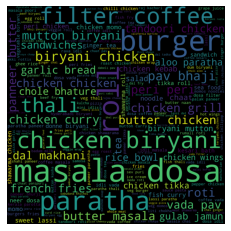

In [100]:
plt.imshow(wordcloud)
plt.axis('off')

In [101]:
WordCloud()

### Analyzing customer reviews

In [102]:
#decapitalizing so good==Good


In [103]:
dataset = df[df['rest_type']=='Quick Bites']      # dataset only containing restaurant from Quick Bites category
dataset.head(3)

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   

                                              address                   name  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...             Foodiction   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...                 Faasos   

   online_order book_table  rate  votes           phone      location  \
3            No         No   3.7     88  +91 9620009302  Banashankari   
31          Yes         No   2.8    506  +91 9916107070  Banashankari   
34          Yes         No   4.2    415  +91 7700020020  Banashankari   

      rest_type                                         dish_liked  \
3   Quick Bites                                        Masala Dosa   
31  Quick Bites  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Quick Bites  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   

   listed_in(city)                     Top_types  
3     Banashankari  Quick Bites + Casual Dinings  
31    Banashankari  Quick Bites + Casual Dinings  
34    Banashankari  Quick Bites + Casual Dinings

In [104]:
# import re (Regular Expression) when working on huge amount of text data
import re

In [105]:
# adding all the review into one string> total_review
total_review=''

for review in dataset['reviews_list']:
    review=re.sub(' +',' ',re.sub('x',' ',re.sub('rated', ' ', re.sub('[^a-zA-z]', ' ',review.lower()))))    # removing >> extra spaces >> 'x' >>'rated'>> special charecters
    total_review+=review

In [106]:
wordcloud2=WordCloud(stopwords=STOPWORDS, height=1500, width=1500,).generate(total_review)   #stopwords are english filler words like is,and,am,in

(-0.5, 1499.5, 1499.5, -0.5)

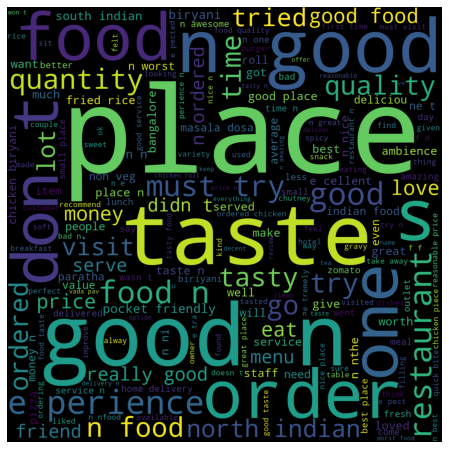

In [107]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud2)
plt.axis('off')

# Preparing your data for the modelling purpose...

In [108]:
# splitting our main dataframe in 2
# new restaurants --> rating will be '0'
# not new restaurants df which will be used to train our ML model

In [109]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [110]:
df['rated']=df['rate'].apply(assign)   #creating a new column rated

In [111]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [112]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [113]:
new_restaurants=df[df['rated']==0]
train_val_restaurants=df.query('rated==1')   #df[df['rated']==1]    

In [114]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     Top_types  rated  
0          Buffet    Banashankari  Quick Bites + Casual Dinings      1  
1          Buffet    Banashankari  Quick Bites + Casual Dinings      1  
2          Buffet    Banashankari                        others      1  
3          Buffet    Banashankari  Quick Bites + Casual Dinings      1  
4          Buffet    Banashankari  Quick Bites + Casual Dinings      1

In [115]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Create a Target variable for storing if restaurant is success or not

In [116]:
#target--?

In [117]:
# in zomto-- there will be a domain expert that will advice if restaurant good or bad
# if rate<3.75-- bad
# in rate>3.75-- good

In [118]:
# for writing optimised code lambda fucntions is to be used instead of noraml fucntions

In [119]:
def GoodBad(x):
    if x>=3.75:
        return 1
    else:
        return 0

In [120]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# warnings can come in case your conda is not updated or some other comaptibility issues; it does affect anything hence can be simply ignored

In [121]:
threshold=3.75
train_val_restaurants['target']=train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)

# some warnings came while executing this hence warning module is used to ignore them

In [122]:
x=train_val_restaurants['target'].value_counts()
x
# checking if there is any imbalance in our data i.e., like if nmbr of 1s are much greater than nmbr of 0s

0    21421
1    20244
Name: target, dtype: int64

In [123]:
labels=x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x188fdfac250>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

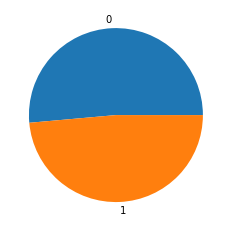

In [124]:
plt.pie(x, labels=labels)

### Perform feature importance of data

In [125]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [126]:
# aur train_val_restaurants having n features but only k features are important to us....n>k

In [127]:
# creating a count fucntion to count number of values in some feature
def count(x):
    return len(x.split(','))

In [128]:
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)

In [129]:
train_val_restaurants['mutliple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [130]:
train_val_restaurants.head(3)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   

                                             address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   
2          Yes         No   3.8    918                  +91 9663487993   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   

  listed_in(type) listed_in(city)                     Top_types rated target  \
0          Buffet    Banashankari  Quick Bites + Casual Dinings     1      1   
1          Buffet    Banashankari  Quick Bites + Casual Dinings     1      1   
2          Buffet    Banashankari                        others     1      1   

   total_cuisines  mutliple_types  
0               3               1  
1               3               1  
2               3               2  

[3 rows x 22 columns]

In [131]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'mutliple_types'],
      dtype='object')

In [132]:
imp_features=['online_order', 'book_table','location', 'rest_type','approx_cost(for two people)', 'listed_in(type)',
'listed_in(city)', 'target',
       'total_cuisines', 'mutliple_types']

In [133]:
data=train_val_restaurants[imp_features]

In [134]:
data.head(3)

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   

   total_cuisines  mutliple_types  
0               3               1  
1               3               1  
2               3               2

In [135]:
data.shape

(41665, 10)

### How to come across your missing values

In [136]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
mutliple_types                   0
dtype: int64

In [137]:
data.dropna(how='any', inplace=True)   # how->removing any row having null value   # inplace making the change permanent (read documentation shift+tab)

In [138]:
data.shape   # only non null data

(41271, 10)

In [139]:
# Now have to seperate our numerical and categorical data 

In [140]:
data.dtypes   

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
mutliple_types                   int64
dtype: object

In [141]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [142]:
num_features=[num for num in data.columns if data[num].dtype!='O']
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'mutliple_types']

In [143]:
# what number of unique category we have in each and every categorical feature

In [144]:
for features in cat_features:
    print('{} has {} unique features'.format(features,data[features].nunique()))

online_order has 2 unique features
book_table has 2 unique features
location has 92 unique features
rest_type has 87 unique features
listed_in(type) has 7 unique features
listed_in(city) has 30 unique features


### Perform Feature Encoding

In [145]:
data[cat_features].head(3)

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari

In [146]:
# this categorical data is all string data
# ML --> works on numerical data
# have to convert this String data --> Number data using Feature Encoding 

In [147]:
# there are tons of feature encoding techniques but the basic one we are gonna use is
## One hot encoding

In [148]:
### One Hot coding coding put unique features in any columns as seperate columns in a new dataframe with putting 1 or 0 respectivily in each row (better explained in the green diary)
## One Hot encoding is suitable for columns having less unique features
# Here Locations have 92 features and rest_type has 87 features, so we will be filtering down less impactfull values 

In [149]:
data['location'].nunique()

92

In [150]:
# contribution of each location in the dataset
values=(data['location'].value_counts()/len(data))*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [151]:
# value below 0.4 has very less contribution so should be placed in "Others"
threshold=0.4

imp=values[values>threshold]
len(imp)

46

In [152]:
imp.nunique()

45

In [153]:
# now we have to put those 47 remaining features in Others
data['location']=np.where(data['location'].isin(imp.index), data['location'], 'other')
# np.where(dataset1.isin(dataset2.index), 'if in put here', 'if not in put here')
# data['location'].apply(lambda x:'Others' if x not in imp.index else x)

In [154]:
data['location'].nunique()

47

In [155]:
data['rest_type'].nunique()

87

In [156]:
val_res=(data['rest_type'].value_counts()/len(data))*100
val_res

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [157]:
threshold2=1.5
imp2=val_res[val_res>threshold2]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [158]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index), data['rest_type'], 'other2')
data['rest_type'].nunique()

11

In [159]:
for features in cat_features:
    print('{} has {} unique features'.format(features, data[features].nunique()))

online_order has 2 unique features
book_table has 2 unique features
location has 47 unique features
rest_type has 11 unique features
listed_in(type) has 7 unique features
listed_in(city) has 30 unique features


In [160]:
# PERFORMING ONE HOT ENCODING

In [161]:
data_cat=data[cat_features]
data_cat.head(2)

online_order book_table      location      rest_type listed_in(type)  \
0          Yes        Yes  Banashankari  Casual Dining          Buffet   
1          Yes         No  Banashankari  Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari

In [162]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [163]:
# pd.get_dummies()  is used for One Hot Encoding
# drop_first is used for droping the last column as single 1 in that column can be easily predicted

In [164]:
for col in cat_features:
    col_encoded=pd.get_dummies(data_cat[col], prefix=col, drop_first=True)   # for One Hot Encoding
    data_cat=pd.concat([data_cat, col_encoded], axis=1)    # for adding these new columns to our dataframe
    data_cat.drop(col, axis=1, inplace=True)   # for removing the cuurent columns 

In [165]:
data_cat.shape

(41271, 93)

In [166]:
data_cat.head()

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_Old Airport Road  listed_in(city)_Rajajinagar  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   listed_in(city)_Residency Road  listed_in(city)_Sarjapur Road  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   listed_in(city)_Whitefield  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 93 columns]

### Preparing our data for Machine Learning/Modelling purpose

In [167]:
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'mutliple_types']

In [168]:
data_final = pd.concat([data.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'mutliple_types']],data_cat], axis=1)

# combining the numerical features with data_cat and storing it in data_final
# axis=1 as we are performing this function in vertical way

In [169]:
data_final.head()

approx_cost(for two people)  target  total_cuisines  mutliple_types  \
0                        800.0       1               3               1   
1                        800.0       1               3               1   
2                        800.0       1               3               2   
3                        300.0       0               2               1   
4                        600.0       1               2               1   

   online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  ...  \
0                   0                           0                      0  ...   
1                   0                           0                      0  ...   
2                   0                           0                      0  ...   
3                   0                           0                      0  ...   
4                   0                           0                      1  ...   

   listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_New BEL Road  listed_in(city)_Old Airport Road  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   listed_in(city)_Rajajinagar  listed_in(city)_Residency Road  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   listed_in(city)_Sarjapur Road  listed_in(city)_Whitefield  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  

[5 rows x 97 columns]

In [170]:
# since 'target' columns is containing restaurants rated above 3.75 and is restaurant success or not depends upon the rating
# hence dropping the Target columns since its independent variable

In [171]:
x=data_final.drop('target', axis=1)   # x is your independent data  # inplace false   # Target represents the restaurant is success or not
y=data_final['target']   # dependent data you have to predict

In [172]:
## testing and training

In [173]:
# test data

In [174]:
data_final.shape

(41271, 97)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [177]:
x_train.shape

(33016, 96)

### APPLYING RANDOM FOREST ON DATA

In [178]:
from sklearn.ensemble import RandomForestClassifier    # since this is our classifying use case

In [179]:
model=RandomForestClassifier()

In [180]:
model.fit(x_train, y_train)  # to fit my training data to this model

RandomForestClassifier()

In [181]:
# Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained.
#A model taht is well fitted produces more accurate outcomes.
#A model that is overfitted matches the data too closely while an underfitted one doesn' match closely enough
# fit() method is used to compute mean and standard deviation of the given feature that is further used for scaling.
# transform() performs scaling
# fit_transform() does fitting and scaling both

In [182]:
predictions=model.predict(x_test)

In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score

##### confusion_matrix and accuracy_score are used to get the accurancy of our ML model

In [184]:
confusion_matrix(predictions, y_test)    # since my predictions are with respect to y_test

array([[3506,  942],
       [ 746, 3061]], dtype=int64)

In [185]:
# 3505 and 3061 are the right predictions done by my model while
# 942 and 747 are the wrong predictions done by my model

In [186]:
accuracy_score(predictions, y_test)

0.7955178679588129

In [187]:
data_final.head()

approx_cost(for two people)  target  total_cuisines  mutliple_types  \
0                        800.0       1               3               1   
1                        800.0       1               3               1   
2                        800.0       1               3               2   
3                        300.0       0               2               1   
4                        600.0       1               2               1   

   online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  ...  \
0                   0                           0                      0  ...   
1                   0                           0                      0  ...   
2                   0                           0                      0  ...   
3                   0                           0                      0  ...   
4                   0                           0                      1  ...   

   listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_New BEL Road  listed_in(city)_Old Airport Road  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   listed_in(city)_Rajajinagar  listed_in(city)_Residency Road  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   listed_in(city)_Sarjapur Road  listed_in(city)_Whitefield  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  

[5 rows x 97 columns]

In [188]:
!pip install xgboost

In [189]:
!pip install naive_bayes

In [190]:
# Now comaparing results with different other algorithm and see which algorithm is performing best
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier   # Amazing algorithm

In [191]:
models=[]

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

In [192]:
for name, model in models:
    print(name)
    print(model)

LogisticRegression
LogisticRegression()
Naive Bayes
GaussianNB()
Random Forest
RandomForestClassifier()
XGBoost
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
KNN
KNeighborsClassifier()
Decision Tree
DecisionTreeClassifier()


In [193]:
for name,model in models:
    print(name)
    model.fit(x_train, y_train)  #fitting data for our model    # learning about the data trends from our previous data
    
    predictions=model.predict(x_test)
    
    cm=confusion_matrix(predictions, y_test)
    print(cm)
    
    acc=accuracy_score(predictions, y_test)
    print(acc)
    print('\n')

LogisticRegression
[[3464 1514]
 [ 788 2489]]
0.7211387038158692


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


Random Forest
[[3519  945]
 [ 733 3058]]
0.7967292549969716


XGBoost
[11:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[3691 1104]
 [ 561 2899]]
0.7983040581465778


KNN
[[3623 1006]
 [ 629 2997]]
0.8019382192610539


Decision Tree
[[3652  808]
 [ 600 3195]]
0.8294367050272562


